In [33]:
%cd ~/github/agn_lf/
import source.astro_functions as af
import source.table_functions as tf
import source.lf_xi2 as xi2
import source.lf_vmax as vmax
import numpy as np
import matplotlib.pyplot as plt

/Users/runburg/github/agn_lf


In [34]:
# use table with agn_flag
from astropy.io import fits
import astropy.table as table
catalog = fits.open("data/Anna_Nick_Tractor_photometry_samplev9_MASTER.fits", memmap=True)
# ct = table.Table(catalog[1].data)
# flagged_agn = ct[np.where(ct['agn_flag'] == 1)]
# flagged_agn = table.Table(flagged_agn, masked=True, copy=False)
# # for col in flagged_agn.columns.values():
# #     try:
# #         col.mask = np.isnan(col)
# #     except TypeError:
# #         continue
# flagged_agn.write('./data/flagged_agn.fits', format='fits')
flagged_agn = table.Table.read('./data/flagged_agn.fits')

In [35]:
band = 'Mag_U_CFHT'
band_err = 'Mag_err_U_CFHT'
z_cols = ('zSpec', 'z_eazy')
mid = 'Mag_U_CFHT_abs'
band_vmax = 'Mag_U_CFHT_Vmax'
# mid, low, high = tf.add_abs_mag_and_err_to_table(flagged_agn, band, band_err, z_cols)
# band_vmax = vmax.add_V_max_to_table(flagged_agn, band, band_err, mid, ('zSpec', 'z_eazy'))
# flagged_agn.write('./data/flagged_agn_w_mag_and_vmax.fits')
flagged_agn = table.Table.read('./data/flagged_agn_w_mag_and_vmax.fits')

In [36]:
bins = np.arange(np.ceil(min(flagged_agn[mid])), -18)
vmax_counts = vmax.v_max_counts(flagged_agn, bins, mid, selection_function=np.ones(len(flagged_agn[mid])), vmax_band=band)
flagged_agn[band].data

/Users/runburg/github/agn_lf/source/lf_vmax.py:220: RuntimeWarning: invalid value encountered in greater
  in_bin = (bins[i - 1] < data_table[band].data) & (data_table[band].data < bins[i])


masked_array(data=[22.606075286865234, nan, 22.587841033935547, ...,
                   19.483314514160156, 22.185134887695312,
                   20.052412033081055],
             mask=[False, False, False, ..., False, False, False],
       fill_value=1e+20,
            dtype=float32)

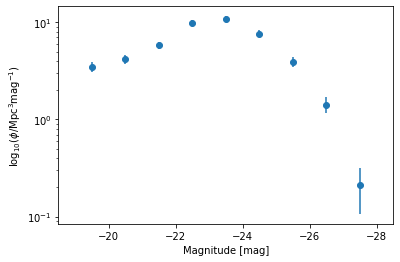

In [37]:
fig, ax = vmax.plot_lf_V_max(*vmax_counts)

In [38]:
bins = np.arange(np.ceil(min(flagged_agn[mid])), -18)
vmax_counts = vmax.v_max_counts(flagged_agn, bins, mid, selection_function=vmax.example_selection_func(flagged_agn[mid]), vmax_band=band)
flagged_agn[band].data

masked_array(data=[22.606075286865234, nan, 22.587841033935547, ...,
                   19.483314514160156, 22.185134887695312,
                   20.052412033081055],
             mask=[False, False, False, ..., False, False, False],
       fill_value=1e+20,
            dtype=float32)

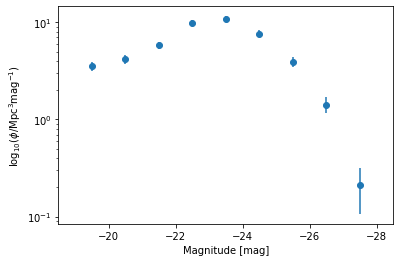

In [39]:
fig, ax = vmax.plot_lf_V_max(*vmax_counts)

In [40]:
# print(vmax_counts)
odr_out = xi2.odr_fit(*vmax_counts, initial_guesses=(10, -24, 0.05, -.5))


Beta: [ 18.52412905 -24.3443023   -0.60172412  -2.41757947]
Beta Std Error: [1.30461441 0.26906234 0.05047366 0.18429856]
Beta Covariance: [[2.32413598 0.27918746 0.0742625  0.15141591]
 [0.27918746 0.098856   0.01528862 0.05720239]
 [0.0742625  0.01528862 0.00347878 0.00838362]
 [0.15141591 0.05720239 0.00838362 0.0463811 ]]
Residual Variance: 0.7323232196579643
Inverse Condition #: 0.0038136289977775428
Reason(s) for Halting:
  Sum of squares convergence


In [41]:
odr_out.beta

array([ 18.52412905, -24.3443023 ,  -0.60172412,  -2.41757947])

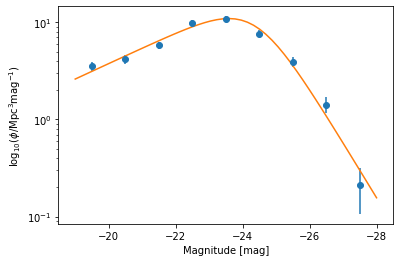

In [42]:
x_vals = np.linspace(min(bins), max(bins))
ax.plot(x_vals, xi2.double_power_law(odr_out.beta, x_vals))
fig

In [43]:
flagged_agn[band, band_vmax]

Mag_U_CFHT,Mag_U_CFHT_Vmax
,Mpc3
float32,float64
22.606075,2321532824.8403134
nan,0.0
22.587841,2321532824.8403134
20.490723,2321532824.8403134
21.727146,2321532824.8403134
21.664654,2321532824.8403134
21.24732,2321532824.8403134
22.805641,2321532824.8403134


In [44]:
catalog = fits.open("data/Anna_Nick_Tractor_photometry_samplev9_MASTER.fits", memmap=True)
ct = table.Table(catalog[1].data)

In [45]:
import source.selection_criteria as sc

flux36 = 'flux_ap2_36'
flux45 = 'flux_ap2_45'
flux58 = 'flux_ap2_58'
flux80 = 'flux_ap2_80'

# try:
#     for i in range(len(ct)):
#         ct[flux36][i] > 10
# except TypeError:
#     print(i, ": ", ct[i])
agn_candidates = sc.select_ir(ct, flux36, flux45, flux58, flux80, selection_cuts='lacy05')
lacy_selected = ct[agn_candidates]

/Users/runburg/github/agn_lf/source/selection_criteria.py:49: RuntimeWarning: invalid value encountered in log10
  lf80_45 = np.log10(flux8_0 / flux4_5)
/Users/runburg/github/agn_lf/source/selection_criteria.py:50: RuntimeWarning: invalid value encountered in log10
  lf58_36 = np.log10(flux5_8 / flux3_6)
/usr/local/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/usr/local/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)


In [46]:
band = 'Mag_U_CFHT'
band_err = 'Mag_err_U_CFHT'
z_cols = ('zSpec', 'z_eazy')
mid = 'Mag_U_CFHT_abs'
band_vmax = 'Mag_U_CFHT_Vmax'
mid, low, high = tf.add_abs_mag_and_err_to_table(lacy_selected, band, band_err, z_cols)
band_vmax = vmax.add_V_max_to_table(lacy_selected, band, band_err, mid, ('zSpec', 'z_eazy'))

vmax_counts = vmax.v_max_counts(lacy_selected, bins, mid, selection_function=np.ones(len(lacy_selected)), vmax_band=band)

Mag is nan for Object 16188                    
Mag is nan for Object 16999                    
Mag is nan for Object 18482                    
Mag is nan for Object 19102                    
Mag is nan for Object 20318                    
Mag is nan for Object 24772                    
Mag is nan for Object 26946                    
Mag is nan for Object 27108                    
Mag is nan for Object 29350                    
Mag is nan for Object 31462                    
Mag is nan for Object 31722                    
Mag is nan for Object 37136                    
Mag is nan for Object 39295                    
Mag is nan for Object 40559                    
Mag is nan for Object 43465                    
Mag is nan for Object 44471                    
Mag is nan for Object 44876                    
Mag is nan for Object 45850                    
Mag is nan for Object 46542                    
Mag is nan for Object 46933                    
Mag is nan for Object 53404             

/Users/runburg/github/agn_lf/source/astro_functions.py:52: RuntimeWarning: divide by zero encountered in log10
  return mag_app - 5 * np.log10(cosmo.luminosity_distance(z).to(u.pc).value / 10) - k_correction(z)



Mag is nan for Object 1138143                  
Mag is nan for Object 1145385                  
Mag is nan for Object 1146725                  
Mag is nan for Object 1147425                  
Mag is nan for Object 1147770                  
Mag is nan for Object 1148869                  
Mag is nan for Object 1160685                  
Mag is nan for Object 1161400                  
Mag is nan for Object 1168948                  
Mag is nan for Object 1175131                  
Mag is nan for Object 1175248                  
Mag is nan for Object 1178782                  
Mag is nan for Object 1179406                  
Mag is nan for Object 1182317                  
Mag is nan for Object 1188249                  
Mag is nan for Object 1188841                  
Mag is nan for Object 1195351                  
Mag is nan for Object 1198339                  
Mag is nan for Object 1201012                  
Mag is nan for Object 1207753                  
Mag is nan for Object 1219225          

Mag is nan for Object 1018647                  
Mag is nan for Object 1019008                  
Mag is nan for Object 1023273                  
Mag is nan for Object 1026724                  
Mag is nan for Object 1026980                  
Mag is nan for Object 1029048                  
Mag is nan for Object 1032501                  
Mag is nan for Object 1032857                  
Mag is nan for Object 1037837                  
Mag is nan for Object 1043211                  
Mag is nan for Object 1043541                  
Mag is nan for Object 1045484                  
Mag is nan for Object 1048339                  
Mag is nan for Object 1049410                  
Mag is nan for Object 1051427                  
Mag is nan for Object 1055754                  
Mag is nan for Object 1056167                  
Mag is nan for Object 1059576                  
Mag is nan for Object 1061295                  
Mag is nan for Object 1065499                  
Mag is nan for Object 1068866           

Mag is nan for Object 1029048                  
Mag is nan for Object 1032501                  
Mag is nan for Object 1032857                  
Mag is nan for Object 1037837                  
Mag is nan for Object 1043211                  
Mag is nan for Object 1043541                  
Mag is nan for Object 1045484                  
Mag is nan for Object 1048339                  
Mag is nan for Object 1049410                  
Mag is nan for Object 1051427                  
Mag is nan for Object 1055754                  
Mag is nan for Object 1056167                  
Mag is nan for Object 1059576                  
Mag is nan for Object 1061295                  
Mag is nan for Object 1065499                  
Mag is nan for Object 1068866                  
Mag is nan for Object 1087541                  
Mag is nan for Object 1089612                  
Mag is nan for Object 1091194                  
Mag is nan for Object 1091253                  
Mag is nan for Object 1094848           

In [47]:
ax.errorbar(vmax_counts[0], vmax_counts[2], yerr=vmax_counts[3], fmt='*', label='Lacy et al. 2005')
ax.legend()
fig

<Figure size 432x288 with 1 Axes>

In [48]:
len(lacy_selected)

3498